<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [146]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [147]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

n_samples = 100

X, y = make_moons(n_samples, shuffle=True, noise=0, random_state=42)

In [148]:
# Turn data into a DataFrame
import pandas as pd

moons = pd.DataFrame({"X1": X[:, 0],
                      "X2": X[:, 1],
                      "y": y})

moons.head(5)


,X1,X2,y
0,1.518393,-0.355143,1
1,0.018441,0.308841,1
2,0.715472,-0.458668,1
3,-0.967295,0.253655,0
4,-0.949056,0.315108,0


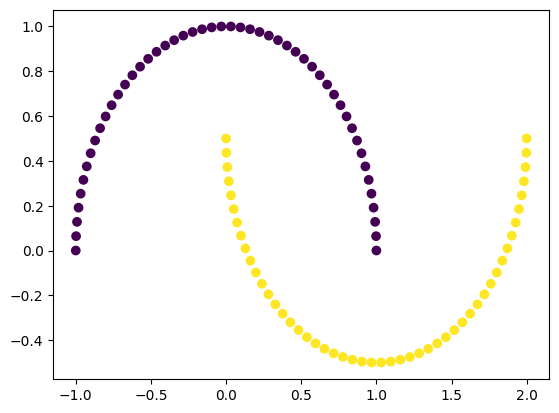

In [149]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)


In [150]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).to(torch.device(device)).to(torch.float32)
y= torch.from_numpy(y).to(torch.device(device)).to(torch.float32)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Type -> {type(X)} | dType -> {X.dtype}")
len(X_train), len(X_test), len(y_train), len(y_test)


Type -> <class 'torch.Tensor'> | dType -> torch.float32


(80, 20, 80, 20)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [151]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self) -> None:
        super().__init__()

        self.layer_0 = nn.Linear(in_features=2, out_features=8)
        self.layer_1 = nn.Linear(in_features=8, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=1)

        self.relu = nn.ReLU() # We use ReLU for non-linearity

    def forward(self, x):
        ## Your code here ##
        return self.layer_2(self.relu(self.layer_1(self.relu(self.layer_0(x)))))

# Instantiate the model
## Your code here ##

model_0 = MoonModelV0().to(device)

print(model_0.state_dict())

with torch.inference_mode():
    y_init_preds = model_0(X_test).squeeze()

y_init_preds
y_init_preds_sig = torch.round(torch.sigmoid(y_init_preds))

OrderedDict([('layer_0.weight', tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], device='cuda:0')), ('layer_0.bias', tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
       device='cuda:0')), ('layer_1.weight', tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
        [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
        [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
        [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
        [ 0.1118, -0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218],
        [ 0.1083, -0.0737,  0.2932, -0.2096, -0.2109, -0.2109,  0.3180,  0.1178],
        [ 0.3402, -0.2918, -0.3507, -0.2766, -0.2378,  0.1432,  0.1266,  0.2938],
       

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [152]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [153]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [154]:
print(f"Initial Accuracy: {acc_fn(y_init_preds_sig, y_test.int())}")

Initial Accuracy: 0.550000011920929


In [155]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 10_000

# Send data to the device


# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()
  

  # 1. Forward pass (logits output)
  y_train_pred = model_0(X_train).squeeze()
  
  # Turn logits into prediction probabilities
  y_train_pred_sig = torch.round(torch.sigmoid(y_train_pred))
  

  # Turn prediction probabilities into prediction labels
  

  # 2. Calculaute the loss
  loss = loss_fn(y_train_pred, y_train)

  # Calculate the accuracy
  acc = acc_fn(y_train_pred_sig, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()
  

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  optimizer.step()

  ### Testing
  model_0.eval() 
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    y_test_pred = model_0(X_test).squeeze()
    
    # Turn the test logits into prediction labels
    y_test_pred_sig = torch.round(torch.sigmoid(y_test_pred))

    # 2. Caculate the test loss/acc
    acc_test = acc_fn(y_test_pred_sig, y_test.int())
    

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Accuracy train: {acc} | Accuracy Test: {acc_test}")
    

Accuracy train: 0.6625000238418579 | Accuracy Test: 0.550000011920929


Accuracy train: 0.5 | Accuracy Test: 0.6000000238418579
Accuracy train: 0.75 | Accuracy Test: 0.949999988079071
Accuracy train: 0.75 | Accuracy Test: 0.949999988079071
Accuracy train: 0.75 | Accuracy Test: 0.949999988079071
Accuracy train: 0.7749999761581421 | Accuracy Test: 0.8999999761581421
Accuracy train: 0.7875000238418579 | Accuracy Test: 0.8999999761581421
Accuracy train: 0.800000011920929 | Accuracy Test: 0.8999999761581421
Accuracy train: 0.8125 | Accuracy Test: 0.8999999761581421
Accuracy train: 0.8125 | Accuracy Test: 0.8999999761581421
Accuracy train: 0.824999988079071 | Accuracy Test: 0.8999999761581421
Accuracy train: 0.824999988079071 | Accuracy Test: 0.949999988079071
Accuracy train: 0.824999988079071 | Accuracy Test: 0.949999988079071
Accuracy train: 0.8374999761581421 | Accuracy Test: 0.949999988079071
Accuracy train: 0.8374999761581421 | Accuracy Test: 0.949999988079071
Accuracy train: 0.8500000238418579 | Accuracy Test: 0.949999988079071
Accuracy train: 0.8625000119

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [156]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

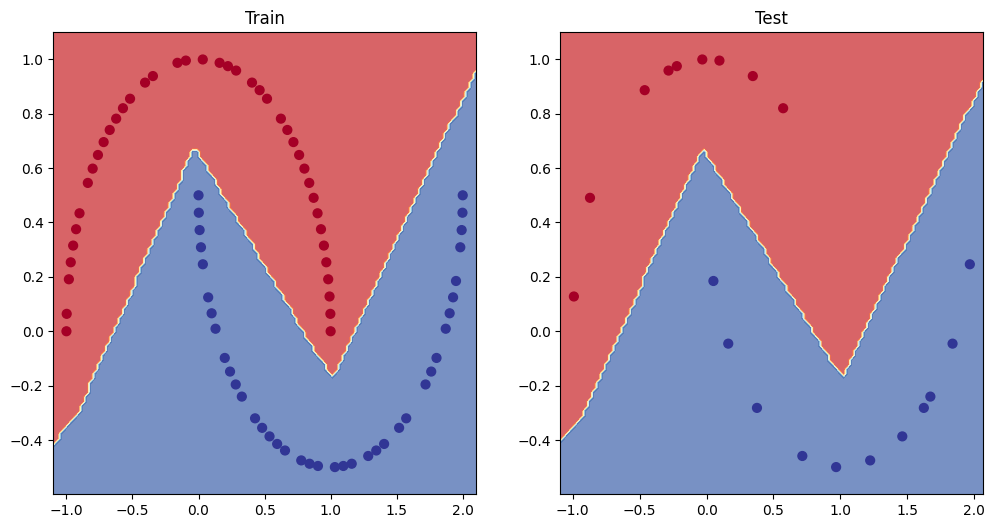

In [157]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)